# Hadamard Gate

## Superposition

Last week we stated that a qubit can be in the basic states $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ or in a superposition of those states: $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

If we apply the *Hadamard* operator, $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$, 
to q, $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, 
and then measure the state of tht qubit state we see roughly 50% one or zero.

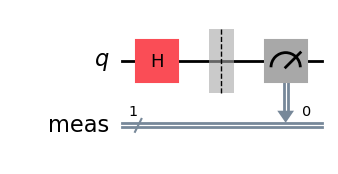

In [1]:
from qiskit import QuantumCircuit
# Create a new circuit with one qubit and add a Hadamard gate to qubit 0
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw("mpl")

Applying the Hadamard operator gives the state:

$$
\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}
$$

Probabilies are calculated by taking the sum of the squares of the absolute values of the amplitudes, giving a 50% chance of measuring either 0 or 1:

$$
|\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2 = 1
$$

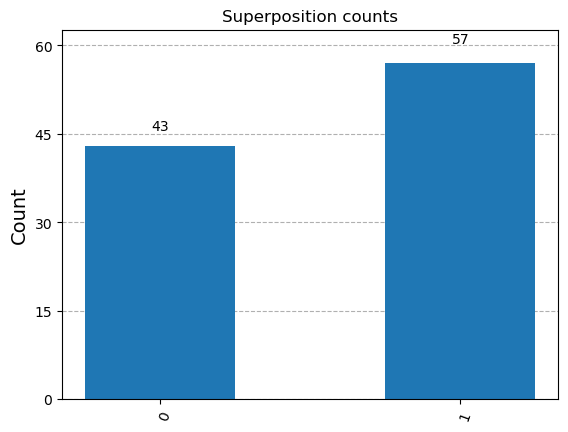

In [2]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Transpile for simulator
backend = AerSimulator()
circ = transpile(qc, backend)

# Run and get counts
result = backend.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Superposition counts')

## Entanglement and Bell States

John Bell proved that the *spooky action at a distance* that Einstien, Podolsky & Rosen first pointed out, has a correlation that is stronger that could exist in classical systems.  
Bell's 1964 experiment proved that there was no hidden variable being shared between the entangled qubits.

Measuring one qubit, in an entangled state, instantaneously determines the value of the other.  
From his experiment he showed four unique distinguishable orthogonal entangled states that are often called the Bell states:
($\Phi^+, \Phi^-, \Psi^+, \Psi^-$).

$$
|\Phi^+\rangle = |\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2  \\
|\Phi^-\rangle = |\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2  \\
|\Psi^+\rangle = |\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2  \\
|\Psi^-\rangle = |\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2
$$

* Bell states are maximally entangled states showing quantum correlations.

* Measuring one qubit alone gives a maximally mixed state (identity matrix), revealing no information.

* Measuring correlated observables (e.g., $\langle X_1 X_2\rangle$​, $\langle Z_1 Z_2\rangle$) distinguishes Bell states.

We also saw a simple circuit with a *Hadamard Gate* and a *Controlled Not (CNOT)* gate.


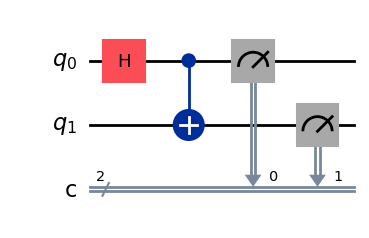

In [3]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2, 2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw("mpl")

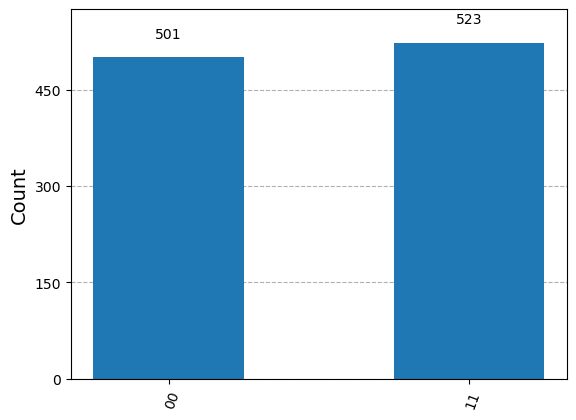

In [4]:
# Simulate
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())

## Reversible Quantum circuits

All quantum circuits are reversible, and we can get the initial conditions from any quantum system.

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
# Create a new circuit with two qubits
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0 and  a controlled-X gate on qubit 1, controlled by qubit 0
qc.h(0)
qc.cx(0, 1)

# Reverse
qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])
qc.draw("mpl")
state = Statevector(qc)
plot_bloch_multivector(state)

QiskitError: 'Cannot apply instruction with classical bits: measure'

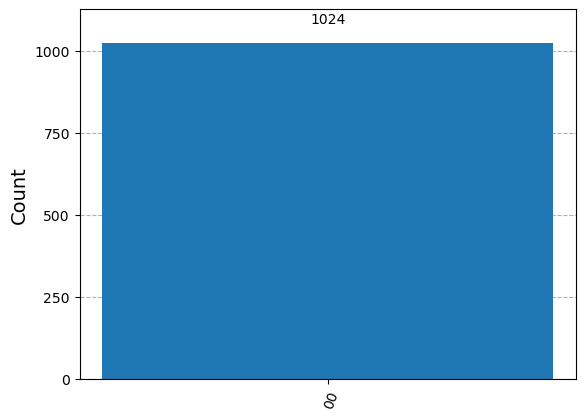

In [6]:
# Simulate
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())

## Superdense Encoding

As desciibed in `Nielsen:2000` (Nielsen & Chuang pp97-98), it involves two parties, Alice and Bob, who are a long way from each other.  
The goal in to transmit some classical information from Alice to Bob.
We can show how Alice can send two classical bits of information to Bob by sending only one single qubit.

In the initial setup, Alica and Bob share a pair of quibits in the entagled stat $|\psi\rangle = $ $ \frac{|00 \rangle + |11\rangle}{\sqrt{2}}$.

Alicae is in possession of the first qubit, and Bob has possition of the second.


So if we were to give someone a pair of entangled qubits in some unknown Bell state all they would have to do to recover the initial conditions is to simply apply the CNOT and Hadamard gates to the pair of qubits. O

In [7]:
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate
qc.h(0)

# measure the qubit
#qc.measure_all()
 
noisy_sampler = Sampler(
    options=dict(backend_options=dict())
)
# The circuit needs to be transpiled to the AerSimulator target
pass_manager = generate_preset_pass_manager(3, AerSimulator())
isa_circuit = pass_manager.run(qc)
pub = (isa_circuit, [0.1] * qc.num_parameters, 100)
job = noisy_sampler.run([pub])
result = job.result()
print(result)
pub_result = result[0]
# Show the histogram
plot_histogram(pub_result.data.meas.get_counts())

# Tell Qiskit how to simulate our circuit
backend = AerSimulator()

from qiskit_ibm_runtime import EstimatorV2 as Estimator
estimator = Estimator(AerSimulator())

# Do the simulation, returning the result
#result = execute(qc,backend, shots=100).result()

#pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
#isa_circuit = pm.run(qc)
#job = estimator.run([(qc, [0.1] * qc.num_parameters)])
#job_result = job.result()


# get the probability distribution
#counts = job_result.get_counts()

# Show the histogram
#plot_histogram(counts)

PrimitiveResult([SamplerPubResult(data=DataBin(), metadata={'shots': 100, 'circuit_metadata': {}, 'simulator_metadata': {'time_taken_parameter_binding': 4.649e-06, 'time_taken_execute': 4.6511e-05, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'max_memory_mb': 19411, 'parallel_experiments': 1}})], metadata={'version': 2})


/home/skingham/miniconda3/envs/py313_ibm_qiskit/lib/python3.13/site-packages/qiskit_aer/primitives/sampler_v2.py:135: UserWarning: The 0-th pub's circuit has no output classical registers and so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(


AttributeError: 'DataBin' object has no attribute 'meas'

In [ ]:
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator

backend = AerSimulator()
# --------------------------
# Simulating using estimator
#---------------------------
from qiskit_aer.primitives import EstimatorV2

psi1 = transpile(RealAmplitudes(num_qubits=2, reps=2), backend, optimization_level=0)
psi2 = transpile(RealAmplitudes(num_qubits=2, reps=3), backend, optimization_level=0)

H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
H2 = SparsePauliOp.from_list([("IZ", 1)])
H3 = SparsePauliOp.from_list([("ZI", 1), ("ZZ", 1)])

theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 1, 2, 3, 5, 8, 13]
theta3 = [1, 2, 3, 4, 5, 6]

estimator = EstimatorV2()

# calculate [ [<psi1(theta1)|H1|psi1(theta1)>,
#              <psi1(theta3)|H3|psi1(theta3)>],
#             [<psi2(theta2)|H2|psi2(theta2)>] ]
job = estimator.run(
    [
        (psi1, [H1, H3], [theta1, theta3]),
        (psi2, H2, theta2)
    ],
    precision=0.01
)
result = job.result()
print(f"expectation values : psi1 = {result[0].data.evs}, psi2 = {result[1].data.evs}")

# --------------------------
# Simulating using sampler
# --------------------------
from qiskit_aer.primitives import SamplerV2
from qiskit import QuantumCircuit

# create a Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# create two parameterized circuits
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc = transpile(pqc, sim, optimization_level=0)
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()
pqc2 = transpile(pqc2, sim, optimization_level=0)

theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 2, 3, 4, 5, 6, 7]

# initialization of the sampler
sampler = SamplerV2()

# collect 128 shots from the Bell circuit
job = sampler.run([bell], shots=128)
job_result = job.result()
print(f"counts for Bell circuit : {job_result[0].data.meas.get_counts()}")
 
# run a sampler job on the parameterized circuits
job2 = sampler.run([(pqc, theta1), (pqc2, theta2)])
job_result = job2.result()
print(f"counts for parameterized circuit : {job_result[0].data.meas.get_counts()}")

# --------------------------------------------------
# Simulating with noise model from actual hardware
# --------------------------------------------------
#from qiskit_ibm_runtime import QiskitRuntimeService
#provider = QiskitRuntimeService(channel='ibm_quantum', token="set your own token here")
#backend = provider.get_backend("ibm_kyoto")

# create sampler from the actual backend
#sampler = SamplerV2.from_backend(backend)

# run a sampler job on the parameterized circuits with noise model of the actual hardware
#bell_t = transpile(bell, AerSimulator(basis_gates=["ecr", "id", "rz", "sx"]), optimization_level=0)
#job3 = sampler.run([bell_t], shots=128)
#job_result = job3.result()
#print(f"counts for Bell circuit w/noise: {job_result[0].data.meas.get_counts()}")


expectation values : psi1 = [ 1.56764655 -1.09774983], psi2 = 0.1979966570792159


NameError: name 'sim' is not defined

In [ ]:
from qiskit import QuantumCircuit, execute, Aer

from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()



# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate
qc.h(0)

# measure the qubit
qc.measure_all()

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('qasm_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=100).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

ImportError: cannot import name 'execute' from 'qiskit' (/Users/skingham/Library/Anaconda/envs/py313_ibm_qiskit/lib/python3.13/site-packages/qiskit/__init__.py)

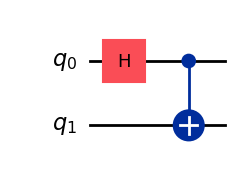

In [ ]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.draw("mpl")

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute
# Create two quantum and classical registers
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

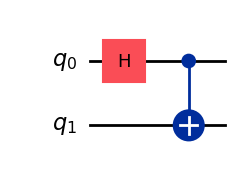

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
 
# circuit for which you want to obtain the expected value
qc = QuantumCircuit(2)
#qc.ry(Parameter('theta'), 0)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl", style="iqp")

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
 
# observable(s) whose expected values you want to compute
from qiskit.quantum_info import SparsePauliOp
observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])
 
# value(s) for the circuit parameter(s)
parameter_values = [] #[[0], [np.pi/6], [np.pi/2]]

# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)

from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

job = estimator.run([(isa_circuit, isa_observable, parameter_values)])
result = job.result()
print(f" > Result class: {type(result)}")
print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Result class: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>
 > Expectation value: 3.999999999999999
 > Metadata: {'target_precision': 0.0, 'circuit_metadata': {}}
